# Protoype

### 1. Pre-event

#### Clean the JSON

In [1]:
import pandas as pd


def convertToDF(input_file):
    with open(input_file, 'r') as infile:
        db = []
        
        for line in infile:
            if line:
                m = {}
                exec("data = "+line.strip(), m)
                data = m['data']
        
                obj = {}
                obj['title'] = data.get('title')
                obj['source_domain'] = data.get('source_domain') or "www.smninewschannel.com"
                obj['description'] = data.get('description')
                obj['maintext'] = data.get('maintext')

                db.append(obj)
                
        df = pd.DataFrame(db)
        return df
        

df = convertToDF("files/articles.txt")
df.to_csv("files/articles.csv")


In [2]:
df

,title,source_domain,description,maintext
0,Reality check? Marcos admits flood control inf...,www.rappler.com,"After saying that over 5,500 flood control pro...",Less than four months after President Ferdinan...
1,Marcos declares November 4 as day of national ...,www.rappler.com,'The national flag shall be flown at half-mast...,"MANILA, Philippines – President Ferdinand Marc..."
2,Marcos says he'd 'rather not' comment on Sara ...,www.rappler.com,"Today's headlines: Marcos & Duterte, Lebron Ja...",Here are today’s headlines – the latest news i...
3,"With no EO, freeports and ecozones 'gray area'...",www.rappler.com,One big ecozone that can issue its own license...,"MANILA, Philippines – Four months after his ve..."
4,"‘I’d rather not’: Again, Marcos skips comment ...",www.rappler.com,Would the President comment on the Vice Presid...,"On All Saints’ Day, as in the weeks and days b..."
...,...,...,...,...
76,President Marcos’ silence on the abuse against...,www.smninewschannel.com,MORE than a week has passed since the overkill...,MORE than a week has passed since the overkill...
77,VP Sara Duterte speaks at the 50th Philippine ...,www.smninewschannel.com,Vice President Sara Duterte speaks at the 50th...,cookielawinfo-checkbox-analytics 11 months Thi...
78,President Marcos Jr. orders acceleration of co...,www.smninewschannel.com,"PRESIDENT Ferdinand Bongbong Marcos, Jr. is pu...","PRESIDENT Ferdinand Bongbong Marcos, Jr. is pu..."
79,"Pagkikita ni VP Sara at Leni Robredo, maitutur...",www.smninewschannel.com,NAGKITA noong nakaraang linggo si Vice Preside...,NAGKITA noong nakaraang linggo si Vice Preside...


#### Keyword extraction

In [3]:
import requests
import re

def extract_keywords(title,content):
    prompt = f"""
        <instructions>
            List all simplified topics in the article in one or two sentences,ensure that
            they reflect the main context of the article including the relevant parties
            involved. Direct to the point, output only the topics, ensure factuality,
            no need to provide any additional information
            
            <output_format>
                1. <Subject> <verb> <topic>.
                2. <Subject> <verb> <topic> ...
                ...
            </output_format>
        </instructions>
        <title>{title}</title>
        <content>{content}</content>
    """
    url = 'http://100.68.153.101:11434/api/generate'
    response = requests.post(url, json={
        'model': 'llama3',
        'prompt': prompt,
        'stream': False
    })
    text = response.json()['response'];
    # return [text]
    lines = text.strip().split('\n')
    unique_names = set()

    pattern = r'^\d+\.\s*([^,\n]+(?:\s+[^,\n]+)*)'
    for line in lines:
        matches = re.findall(pattern, line)
        for match in matches:
            unique_names.add(match.strip())
    
    sorted_names = sorted(unique_names)
    return sorted_names

In [4]:
keywords_db = []

df['keywords'] = None
for index, row in df.iterrows():
    content = row[2]
    keywords = extract_keywords(row[0], content)
    keywords_db.extend(keywords)
    df.at[index, 'keywords'] = keywords
    print(keywords)


df

/tmp/ipykernel_32955/1824330177.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  content = row[2]
/tmp/ipykernel_32955/1824330177.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  keywords = extract_keywords(row[0], content)


['Flood control projects not enough for severe weather events.', 'Marcos acknowledges need for improved flood management.', 'Marcos admits flood control infrastructure is insufficient.', 'Marcos faces criticism on flooding problem after SONA.', 'Philippines struggles with flood control and prevention.']
['Government orders flag flying at half-mast on November 4.', 'Philippines declares day of national mourning for Kristine victims.']
["Marcos declines to comment on Sara Duterte's outbursts.", 'Sara Duterte publicly criticizes...']
['CEZA issues its own licenses due to no EO.', 'Freeports and ecozones become "gray area" in Marcos\' POGO ban.', 'Katrina Ponce Enrile runs CEZA']
["Marcos declines to comment on VP Duterte's remarks.", "Marcos refuses to discuss VP Duterte's tirades."]
['Senate President calls for more thoughtful communication from the Vice President.', 'Senate President criticizes Vice President for hasty public statements.', "Vice President's public statements spark contr

,title,source_domain,description,maintext,keywords
0,Reality check? Marcos admits flood control inf...,www.rappler.com,"After saying that over 5,500 flood control pro...",Less than four months after President Ferdinan...,[Flood control projects not enough for severe ...
1,Marcos declares November 4 as day of national ...,www.rappler.com,'The national flag shall be flown at half-mast...,"MANILA, Philippines – President Ferdinand Marc...",[Government orders flag flying at half-mast on...
2,Marcos says he'd 'rather not' comment on Sara ...,www.rappler.com,"Today's headlines: Marcos & Duterte, Lebron Ja...",Here are today’s headlines – the latest news i...,[Marcos declines to comment on Sara Duterte's ...
3,"With no EO, freeports and ecozones 'gray area'...",www.rappler.com,One big ecozone that can issue its own license...,"MANILA, Philippines – Four months after his ve...","[CEZA issues its own licenses due to no EO., F..."
4,"‘I’d rather not’: Again, Marcos skips comment ...",www.rappler.com,Would the President comment on the Vice Presid...,"On All Saints’ Day, as in the weeks and days b...",[Marcos declines to comment on VP Duterte's re...
...,...,...,...,...,...
76,President Marcos’ silence on the abuse against...,www.smninewschannel.com,MORE than a week has passed since the overkill...,MORE than a week has passed since the overkill...,[KOJC members experience trauma from police ar...
77,VP Sara Duterte speaks at the 50th Philippine ...,www.smninewschannel.com,Vice President Sara Duterte speaks at the 50th...,cookielawinfo-checkbox-analytics 11 months Thi...,[Philippine Chamber of Commerce organizes the ...
78,President Marcos Jr. orders acceleration of co...,www.smninewschannel.com,"PRESIDENT Ferdinand Bongbong Marcos, Jr. is pu...","PRESIDENT Ferdinand Bongbong Marcos, Jr. is pu...","[Marcos Jr. pushes for affordable medication.,..."
79,"Pagkikita ni VP Sara at Leni Robredo, maitutur...",www.smninewschannel.com,NAGKITA noong nakaraang linggo si Vice Preside...,NAGKITA noong nakaraang linggo si Vice Preside...,[They meet at VP Sara's residence in Naga City...


In [5]:
keywords_df = pd.DataFrame(list(set(keywords_db)), columns=['keyword'])
keywords_df

,keyword
0,Gordon accuses Duque and Lao of graft.
1,Former Vice President Leni Robredo seeks publi...
2,President Marcos Jr.'s trust ratings decrease.
3,Lawmakers react to VP Sara Duterte's remarks.
4,Bongbong Marcos Jr. supports Jericho Petilla d...
...,...
201,Sara Duterte and Risa Hontiveros clash during ...
202,House hearing questions DepEd's use of confide...
203,President Marcos remains silent on the abuse a...
204,Senator Sherwin Gatchalian makes statement abo...


#### Embedding keywords

In [6]:
import requests
def embed(keyword):
    prompt = keyword
    url = 'http://100.68.153.101:11434/api/embeddings'
    response = requests.post(url, json={
        'model': 'llama3',
        'prompt': prompt,
    })
    return response.json()['embedding']

In [7]:
keywords_df['embeddings'] = keywords_df['keyword'].apply(embed)

#### UMAP - Dimensionality Reduction


In [8]:
keywords_df.columns

Index(['keyword', 'embeddings'], dtype='object')

In [9]:
import pandas as pd
import umap
import numpy as np
keywords_df['embeddings']
embeddings = np.array(keywords_df['embeddings'].tolist())
umap_model = umap.UMAP(n_components=10)
reduced_embeddings = umap_model.fit_transform(embeddings)

keywords_df['umap_0'] = reduced_embeddings[:, 0]
keywords_df['umap_1'] = reduced_embeddings[:, 1]
keywords_df['umap_2'] = reduced_embeddings[:, 2]
keywords_df['umap_3'] = reduced_embeddings[:, 3]
keywords_df['umap_4'] = reduced_embeddings[:, 4]
keywords_df['umap_5'] = reduced_embeddings[:, 5]
keywords_df['umap_6'] = reduced_embeddings[:, 6]
keywords_df['umap_7'] = reduced_embeddings[:, 7]
keywords_df['umap_8'] = reduced_embeddings[:, 8]
keywords_df['umap_9'] = reduced_embeddings[:, 9]

keywords_df

/home/vscode/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,keyword,embeddings,umap_0,umap_1,umap_2,umap_3,umap_4,umap_5,umap_6,umap_7,umap_8,umap_9
0,Gordon accuses Duque and Lao of graft.,"[-0.9669890403747559, -3.9824750423431396, -1....",11.334561,5.872044,0.469370,4.609237,5.294997,8.756557,4.907629,4.805919,4.221025,1.755726
1,Former Vice President Leni Robredo seeks publi...,"[-2.5952088832855225, -1.4752153158187866, 1.6...",10.483706,7.135831,-1.922241,5.149842,4.397820,7.661490,5.311501,4.406199,4.221785,1.209798
2,President Marcos Jr.'s trust ratings decrease.,"[-1.5325068235397339, -3.996565580368042, -0.6...",11.076096,6.277440,0.065921,4.981649,6.011205,8.348328,6.028069,5.157027,4.364272,1.560358
3,Lawmakers react to VP Sara Duterte's remarks.,"[-3.996124267578125, -1.7798683643341064, -1.2...",10.957867,6.085035,-0.687864,4.802353,5.252271,8.246022,4.872430,5.686558,3.707558,1.082070
4,Bongbong Marcos Jr. supports Jericho Petilla d...,"[-2.3067808151245117, -3.3222014904022217, 0.4...",10.652484,6.934315,-1.196631,5.125938,4.886853,7.923491,5.238908,4.467001,4.401216,1.349988
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sara Duterte and Risa Hontiveros clash during ...,"[-4.944825172424316, -1.14555823802948, -0.127...",10.788331,6.314340,-0.970026,4.944533,4.668539,8.404864,4.560591,5.746133,4.068606,1.212525
202,House hearing questions DepEd's use of confide...,"[-3.053586483001709, -4.274633407592773, 0.234...",11.221071,5.792305,-0.825217,4.538020,4.969244,8.270128,4.732051,6.139256,3.516322,0.987486
203,President Marcos remains silent on the abuse a...,"[-2.6855170726776123, -2.844208240509033, -1.4...",10.563891,6.165829,0.945709,5.509303,5.675657,8.626791,4.978839,5.148104,4.760966,1.790599
204,Senator Sherwin Gatchalian makes statement abo...,"[-3.3892204761505127, -4.124288082122803, 1.73...",10.840316,5.811880,-0.037641,5.033570,4.608423,8.778818,4.387987,6.187579,3.997305,1.387430


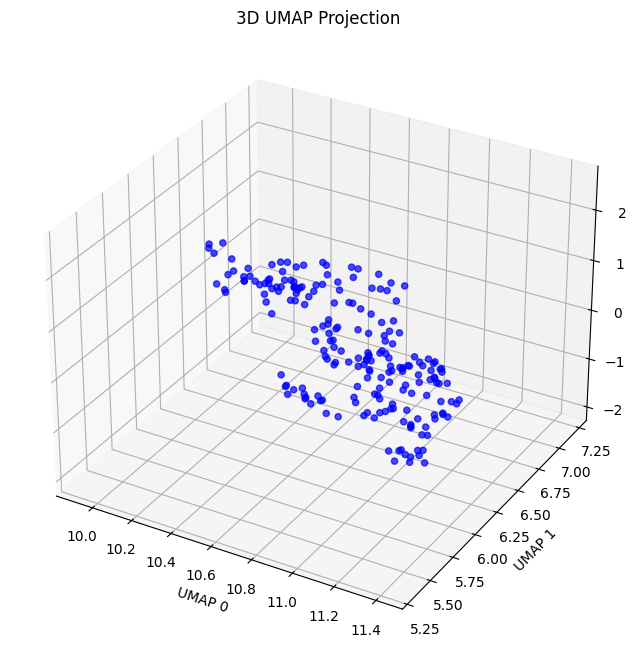

In [10]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(25, 20))
# plt.scatter(keywords_df['umap_0'], keywords_df['umap_1'], c='blue', edgecolors='k', alpha=0.7)

# # Annotate points with 'keyword'
# for i, keyword in enumerate(keywords_df['keyword']):
#     plt.annotate(f"  {keyword}", (keywords_df['umap_0'][i], keywords_df['umap_1'][i], keywords_df['umap_2'][i]), fontsize=7, alpha=0.7)

# plt.title('UMAP Projection')
# plt.xlabel('UMAP 0')
# plt.ylabel('UMAP 1')

# plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(keywords_df['umap_0'], keywords_df['umap_1'], keywords_df['umap_2'], c='blue', marker='o', alpha=0.7)

# Optional: Annotate points with 'keyword' if applicable
# for i, keyword in enumerate(keywords_df['keyword']):
#     ax.text(keywords_df['umap_0'][i], keywords_df['umap_1'][i], keywords_df['umap_2'][i], keyword, size=9)

# Labels and title
ax.set_xlabel('UMAP 0')
ax.set_ylabel('UMAP 1')
ax.set_zlabel('UMAP 2')
ax.set_title('3D UMAP Projection')

plt.show()

#### Clustering

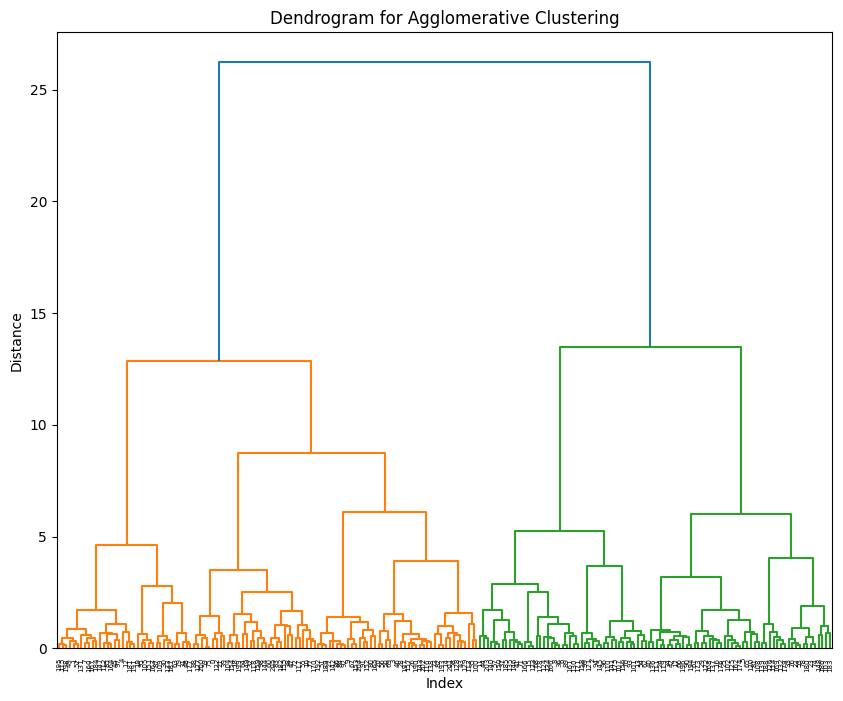

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

X = keywords_df[[
    'umap_0',
    'umap_1',
    'umap_2',
    'umap_3',
    'umap_4',
    'umap_5',
    'umap_6',
    'umap_7',
    'umap_8',
    'umap_9',
]]
# Create a dendrogram to visualize the clustering hierarchy
plt.figure(figsize=(10, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))  # 'ward' is the default linkage method
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

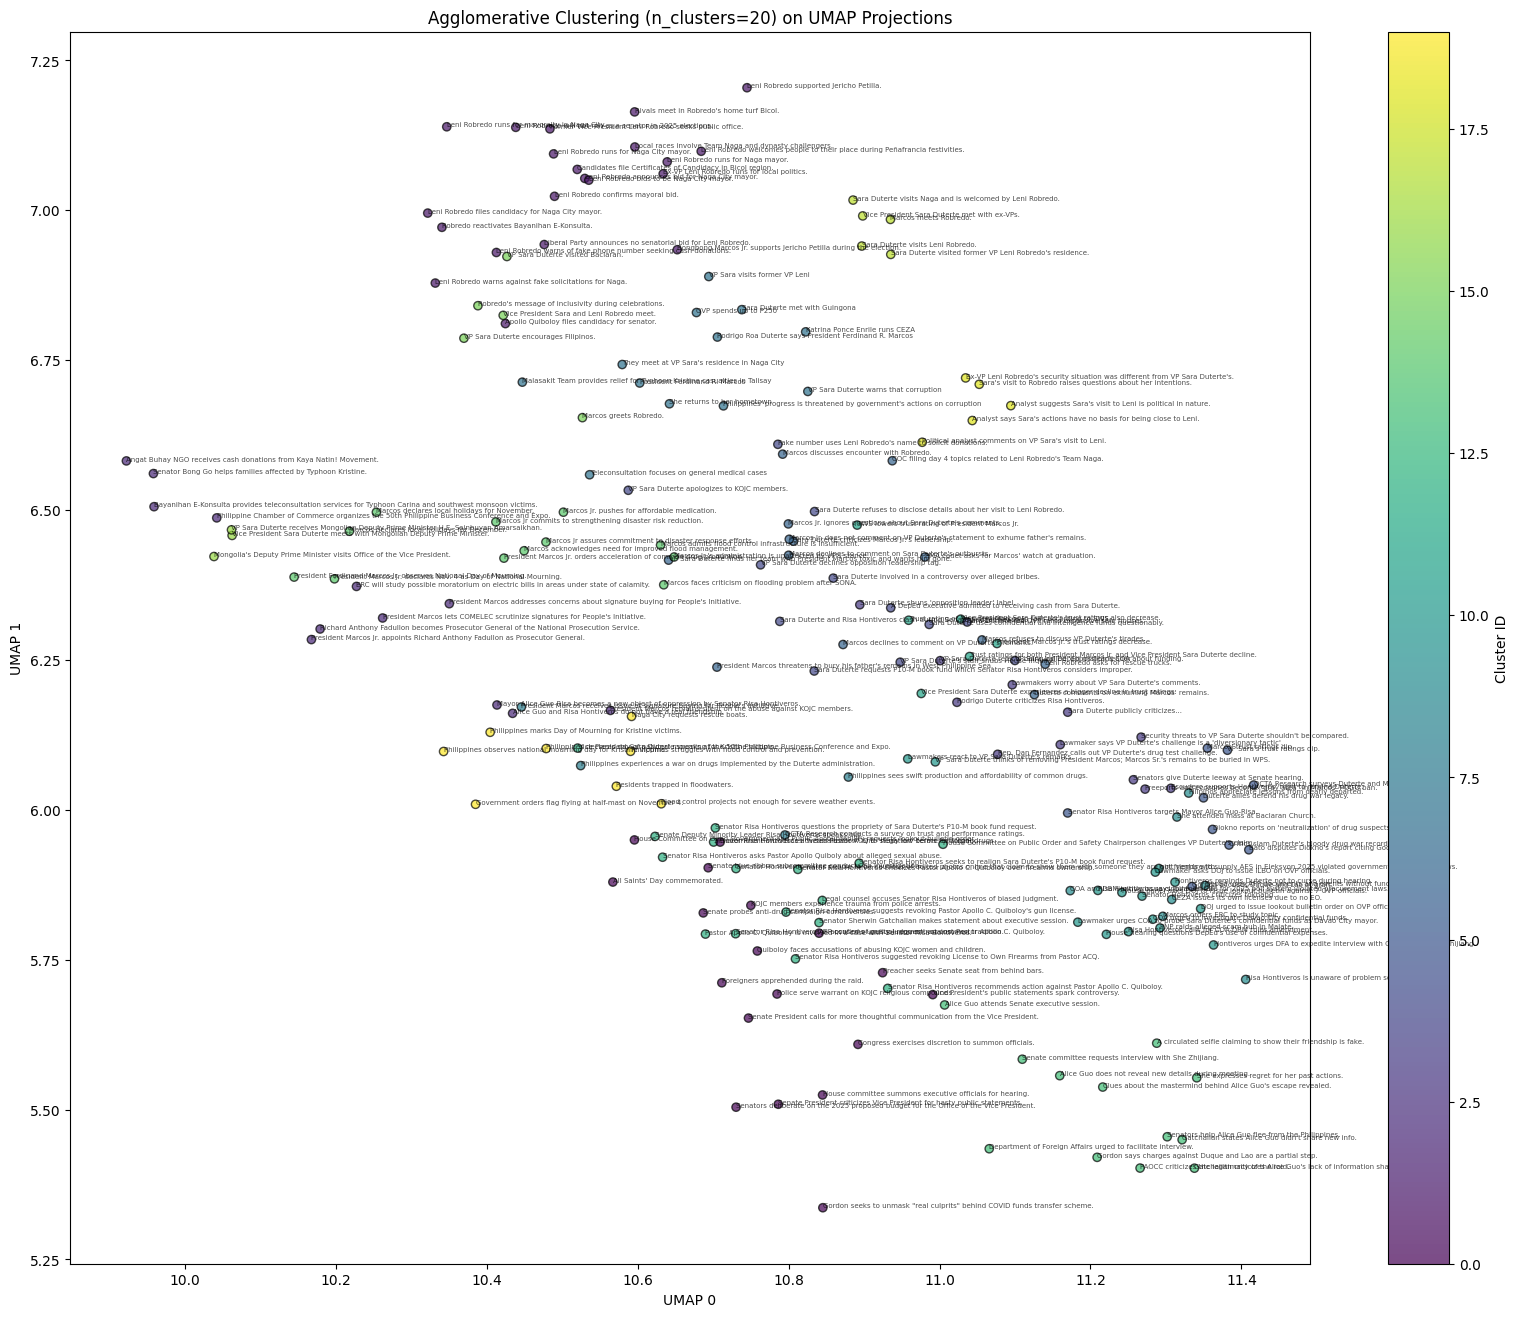

In [12]:
n_clusters = 20
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
keywords_df['cluster'] = agg_clust.fit_predict(X)

# Plotting the UMAP projection with clusters
plt.figure(figsize=(20, 16))
plt.scatter(keywords_df['umap_0'], keywords_df['umap_1'], c=keywords_df['cluster'], cmap='viridis', edgecolors='k', alpha=0.7)

# Annotate points with 'keyword'
for i, keyword in enumerate(keywords_df['keyword']):
    plt.annotate(keyword, (keywords_df['umap_0'][i], keywords_df['umap_1'][i]), fontsize=5, alpha=0.7)

plt.title(f'Agglomerative Clustering (n_clusters={n_clusters}) on UMAP Projections')
plt.xlabel('UMAP 0')
plt.ylabel('UMAP 1')
plt.colorbar(label='Cluster ID')
plt.show()


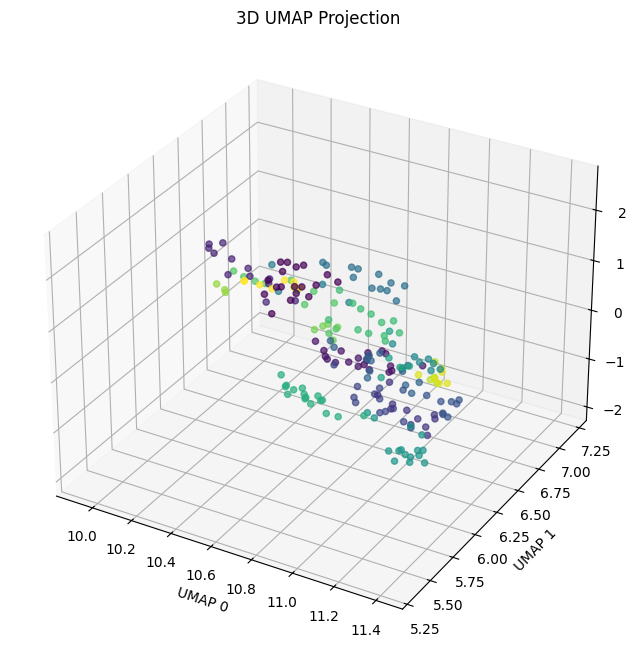

In [13]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(25, 20))
# plt.scatter(keywords_df['umap_0'], keywords_df['umap_1'], c='blue', edgecolors='k', alpha=0.7)

# # Annotate points with 'keyword'
# for i, keyword in enumerate(keywords_df['keyword']):
#     plt.annotate(f"  {keyword}", (keywords_df['umap_0'][i], keywords_df['umap_1'][i], keywords_df['umap_2'][i]), fontsize=7, alpha=0.7)

# plt.title('UMAP Projection')
# plt.xlabel('UMAP 0')
# plt.ylabel('UMAP 1')

# plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(keywords_df['umap_0'], keywords_df['umap_1'], keywords_df['umap_2'], c=keywords_df['cluster'], marker='o', alpha=0.7)

# Optional: Annotate points with 'keyword' if applicable
# for i, keyword in enumerate(keywords_df['keyword']):
#     ax.text(keywords_df['umap_0'][i], keywords_df['umap_1'][i], keywords_df['umap_2'][i], keyword, size=9)

# Labels and title
ax.set_xlabel('UMAP 0')
ax.set_ylabel('UMAP 1')
ax.set_zlabel('UMAP 2')
ax.set_title('3D UMAP Projection')

plt.show()

In [14]:
keywords_df

,keyword,embeddings,umap_0,umap_1,umap_2,umap_3,umap_4,umap_5,umap_6,umap_7,umap_8,umap_9,cluster
0,Gordon accuses Duque and Lao of graft.,"[-0.9669890403747559, -3.9824750423431396, -1....",11.334561,5.872044,0.469370,4.609237,5.294997,8.756557,4.907629,4.805919,4.221025,1.755726,5
1,Former Vice President Leni Robredo seeks publi...,"[-2.5952088832855225, -1.4752153158187866, 1.6...",10.483706,7.135831,-1.922241,5.149842,4.397820,7.661490,5.311501,4.406199,4.221785,1.209798,1
2,President Marcos Jr.'s trust ratings decrease.,"[-1.5325068235397339, -3.996565580368042, -0.6...",11.076096,6.277440,0.065921,4.981649,6.011205,8.348328,6.028069,5.157027,4.364272,1.560358,11
3,Lawmakers react to VP Sara Duterte's remarks.,"[-3.996124267578125, -1.7798683643341064, -1.2...",10.957867,6.085035,-0.687864,4.802353,5.252271,8.246022,4.872430,5.686558,3.707558,1.082070,10
4,Bongbong Marcos Jr. supports Jericho Petilla d...,"[-2.3067808151245117, -3.3222014904022217, 0.4...",10.652484,6.934315,-1.196631,5.125938,4.886853,7.923491,5.238908,4.467001,4.401216,1.349988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sara Duterte and Risa Hontiveros clash during ...,"[-4.944825172424316, -1.14555823802948, -0.127...",10.788331,6.314340,-0.970026,4.944533,4.668539,8.404864,4.560591,5.746133,4.068606,1.212525,4
202,House hearing questions DepEd's use of confide...,"[-3.053586483001709, -4.274633407592773, 0.234...",11.221071,5.792305,-0.825217,4.538020,4.969244,8.270128,4.732051,6.139256,3.516322,0.987486,10
203,President Marcos remains silent on the abuse a...,"[-2.6855170726776123, -2.844208240509033, -1.4...",10.563891,6.165829,0.945709,5.509303,5.675657,8.626791,4.978839,5.148104,4.760966,1.790599,2
204,Senator Sherwin Gatchalian makes statement abo...,"[-3.3892204761505127, -4.124288082122803, 1.73...",10.840316,5.811880,-0.037641,5.033570,4.608423,8.778818,4.387987,6.187579,3.997305,1.387430,12


In [15]:
keywords_df[ keywords_df['cluster'] ==15 ]

,keyword,embeddings,umap_0,umap_1,umap_2,umap_3,umap_4,umap_5,umap_6,umap_7,umap_8,umap_9,cluster
19,Marcos greets Robredo.,"[-4.102725505828857, -3.029240608215332, 1.690...",10.526771,6.654191,-0.668462,5.245506,5.053014,8.258871,4.835528,4.806301,4.144795,1.399181,15
95,Robredo's message of inclusivity during celebr...,"[-2.668468952178955, -3.8619799613952637, 2.21...",10.388327,6.840902,-0.834139,5.360151,5.066050,8.039254,5.018023,4.386505,4.076384,1.437589,15
105,VP Sara Duterte visited Baclaran.,"[-4.143603801727295, -3.143331527709961, 1.582...",10.426727,6.922960,-0.945655,5.305125,4.942684,8.092745,4.956001,4.418203,4.020757,1.408487,15
151,VP Sara Duterte encourages Filipinos.,"[-2.2852044105529785, -2.929382801055908, 1.08...",10.369760,6.786683,-0.844646,5.352870,5.063597,8.083889,4.895943,4.628701,3.994034,1.393632,15
163,Vice President Sara and Leni Robredo meet.,"[-3.714123010635376, -2.735440731048584, 0.605...",10.421799,6.824807,-0.729889,5.330097,5.072399,8.193425,4.897988,4.506689,4.056407,1.452994,15


#### Cluster summarizer

In [16]:
import requests

def summarize_keywords(keywords):
    prompt = f"""
        <events>
            {"\n".join(map(lambda keyword: f'"- {keyword}"', keywords))}
        </events>
        <instructions>
          Provide only a short phrase summarizing the entire set of events.
          If too general, emphasize the most important event and end the phrase with something like "and other events."
          IMPORTANT: Respond with a brief and short phrase only
        </instructions>
    """
    url = 'http://100.68.153.101:11434/api/generate'
    response = requests.post(url, json={
        'model': 'llama3',
        'prompt': prompt,
        'stream': False
    })
    text = response.json()['response'];
    return text

In [17]:
cluster_titles = []

for cluster_id in keywords_df['cluster'].unique():
    cluster_keywords = keywords_df[ keywords_df['cluster'] == cluster_id ]['keyword'].tolist()
    cluster_title = summarize_keywords(cluster_keywords)
    cluster_titles.append(cluster_title)
    print(cluster_title)
    print()


"Duterte's drug war legacy faces scrutiny and other events."

Leni Robredo runs for Naga City mayor and other events.

Trust ratings for Philippine leaders decline.

"Philippine lawmakers tackle various issues."

"Misconduct and controversy surround Vice President, KOJC, and government officials"

President Marcos Jr.'s administration addresses various issues, including disasters, healthcare, and holidays, and other events.

Senator Risa Hontiveros' criticisms of Pastor Apollo C. Quiboloy and Vice President Sara Duterte, and other events.

"Philippine presidential politics in turmoil over Marcos Jr.'s leadership and VP Sara Duterte's outbursts."

President Marcos addresses key issues amidst various events.

"VP Sara Duterte addresses corruption and other events."

"Sara Duterte controversy and scandals unfold" and other events.

Mongolian official visits VP Sara Duterte and other events.

Alice Guo's controversy escalates amid Senate executive session and escape.

"VP Sara Duterte's co

#### Save everything

In [18]:
df.to_pickle("files/articles.pkl")
keywords_df.to_pickle("files/keywords.pkl")
with open("files/cluster_titles.txt", "w") as f:
    f.write('\n'.join(cluster_titles))

In [19]:
keywords_df

,keyword,embeddings,umap_0,umap_1,umap_2,umap_3,umap_4,umap_5,umap_6,umap_7,umap_8,umap_9,cluster
0,Gordon accuses Duque and Lao of graft.,"[-0.9669890403747559, -3.9824750423431396, -1....",11.334561,5.872044,0.469370,4.609237,5.294997,8.756557,4.907629,4.805919,4.221025,1.755726,5
1,Former Vice President Leni Robredo seeks publi...,"[-2.5952088832855225, -1.4752153158187866, 1.6...",10.483706,7.135831,-1.922241,5.149842,4.397820,7.661490,5.311501,4.406199,4.221785,1.209798,1
2,President Marcos Jr.'s trust ratings decrease.,"[-1.5325068235397339, -3.996565580368042, -0.6...",11.076096,6.277440,0.065921,4.981649,6.011205,8.348328,6.028069,5.157027,4.364272,1.560358,11
3,Lawmakers react to VP Sara Duterte's remarks.,"[-3.996124267578125, -1.7798683643341064, -1.2...",10.957867,6.085035,-0.687864,4.802353,5.252271,8.246022,4.872430,5.686558,3.707558,1.082070,10
4,Bongbong Marcos Jr. supports Jericho Petilla d...,"[-2.3067808151245117, -3.3222014904022217, 0.4...",10.652484,6.934315,-1.196631,5.125938,4.886853,7.923491,5.238908,4.467001,4.401216,1.349988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sara Duterte and Risa Hontiveros clash during ...,"[-4.944825172424316, -1.14555823802948, -0.127...",10.788331,6.314340,-0.970026,4.944533,4.668539,8.404864,4.560591,5.746133,4.068606,1.212525,4
202,House hearing questions DepEd's use of confide...,"[-3.053586483001709, -4.274633407592773, 0.234...",11.221071,5.792305,-0.825217,4.538020,4.969244,8.270128,4.732051,6.139256,3.516322,0.987486,10
203,President Marcos remains silent on the abuse a...,"[-2.6855170726776123, -2.844208240509033, -1.4...",10.563891,6.165829,0.945709,5.509303,5.675657,8.626791,4.978839,5.148104,4.760966,1.790599,2
204,Senator Sherwin Gatchalian makes statement abo...,"[-3.3892204761505127, -4.124288082122803, 1.73...",10.840316,5.811880,-0.037641,5.033570,4.608423,8.778818,4.387987,6.187579,3.997305,1.387430,12


### 2. Scoring

#### Test event

In [2]:
import pandas as pd

# Load the pickled DataFrame
df = pd.read_pickle("files/articles.pkl")
keywords_df = pd.read_pickle("files/keywords.pkl")
with open("files/cluster_titles.txt", "r") as f:
    cluster_titles = f.read().split('\n')

df

,title,source_domain,description,maintext,keywords
0,Reality check? Marcos admits flood control inf...,www.rappler.com,"After saying that over 5,500 flood control pro...",Less than four months after President Ferdinan...,[Flood control projects not enough for severe ...
1,Marcos declares November 4 as day of national ...,www.rappler.com,'The national flag shall be flown at half-mast...,"MANILA, Philippines – President Ferdinand Marc...",[Government orders flag flying at half-mast on...
2,Marcos says he'd 'rather not' comment on Sara ...,www.rappler.com,"Today's headlines: Marcos & Duterte, Lebron Ja...",Here are today’s headlines – the latest news i...,[Marcos declines to comment on Sara Duterte's ...
3,"With no EO, freeports and ecozones 'gray area'...",www.rappler.com,One big ecozone that can issue its own license...,"MANILA, Philippines – Four months after his ve...","[CEZA issues its own licenses due to no EO., F..."
4,"‘I’d rather not’: Again, Marcos skips comment ...",www.rappler.com,Would the President comment on the Vice Presid...,"On All Saints’ Day, as in the weeks and days b...",[Marcos declines to comment on VP Duterte's re...
...,...,...,...,...,...
76,President Marcos’ silence on the abuse against...,www.smninewschannel.com,MORE than a week has passed since the overkill...,MORE than a week has passed since the overkill...,[KOJC members experience trauma from police ar...
77,VP Sara Duterte speaks at the 50th Philippine ...,www.smninewschannel.com,Vice President Sara Duterte speaks at the 50th...,cookielawinfo-checkbox-analytics 11 months Thi...,[Philippine Chamber of Commerce organizes the ...
78,President Marcos Jr. orders acceleration of co...,www.smninewschannel.com,"PRESIDENT Ferdinand Bongbong Marcos, Jr. is pu...","PRESIDENT Ferdinand Bongbong Marcos, Jr. is pu...","[Marcos Jr. pushes for affordable medication.,..."
79,"Pagkikita ni VP Sara at Leni Robredo, maitutur...",www.smninewschannel.com,NAGKITA noong nakaraang linggo si Vice Preside...,NAGKITA noong nakaraang linggo si Vice Preside...,[They meet at VP Sara's residence in Naga City...


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

class MatrixFactorizationModel(nn.Module):
    def __init__(self, num_sources, num_politicians, num_factors, lambda_reg=0.01):
        super(MatrixFactorizationModel, self).__init__()
        
        # Latent factor matrices for sources and politicians
        self.f_s = nn.Parameter(torch.randn(num_sources))  # Latent factors for sources
        self.f_p = nn.Parameter(torch.randn(num_politicians))  # Latent factors for politicians
        
        # Global bias
        self.u = nn.Parameter(torch.randn(1))

        # Bias terms for sources and politicians
        self.i_s = nn.Parameter(torch.randn(num_sources))  # Bias for sources
        self.i_p = nn.Parameter(torch.randn(num_politicians))  # Bias for politicians
        
        self.lambda_reg = lambda_reg  # Regularization strength
    
    def forward(self, source_idx, pol_idx):
        # Matrix factorization equation: M_sp = i_s + i_p + f_s * f_p^T
        pred = self.u[0] + self.i_s[source_idx] + self.i_p[pol_idx] + self.f_s[source_idx] * self.f_p[pol_idx]
        return pred

In [4]:
# Training Function
def train(model, data, num_epochs=100, learning_rate=0.01):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        total_loss = 0.0
        for pol_idx, source_idx, sentiment, idx in data:
            rating = torch.tensor(sentiment, dtype=torch.float)
            
            optimizer.zero_grad()
            
            # Forward pass
            pred = model(source_idx, pol_idx)
            
            # Loss computation with regularization

            lambda_intercept = 0.15
            lambda_factor = 0.03

            loss = criterion(pred, rating) + lambda_intercept * (
                model.u[0].pow(2).sum() +
                model.i_s[source_idx].pow(2).sum() + model.i_p[pol_idx].pow(2).sum()) + lambda_factor * (model.f_s[source_idx].pow(2).sum() + model.f_p[pol_idx].pow(2).sum())
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

In [54]:
# import math 
from torch.utils.data import Dataset, DataLoader

def create_dataset_from_cluster(cluster_id):
    def load_normalized_politicians():
        pol_df = pd.read_csv("files/normalized_politicians.csv")
        return pol_df
    
    def sentiment_to_id(sentiment):
        if sentiment == "POSITIVE":
            return 1
        elif sentiment == "NEUTRAL":
            return 0
        else:
            return -1

    title = cluster_titles[cluster_id]

    cluster_df = keywords_df[ keywords_df['cluster'] == cluster_id ]
    keywords = cluster_df['keyword'].tolist()

    dataframe = df[ df['keywords'].apply(lambda x: any(keyword in x for keyword in keywords)) ]

    pol_df = load_normalized_politicians()
    articles_titles = dataframe['title'].tolist()

    pol_df = pol_df[ pol_df['title'].isin(articles_titles) ]

    politician_names = pol_df['politician'].unique()
    politician_to_id = {name: idx for idx, name in enumerate(politician_names)}

    source_names = pol_df['source'].unique()
    source_to_id = {name: idx for idx, name in enumerate(source_names)}
    
    pol_df['politician'] = pol_df['politician'].map(politician_to_id)
    pol_df['source'] = pol_df['source'].map(source_to_id)
    pol_df['sentiment'] = pol_df['sentiment'].map(sentiment_to_id)

    class PoliticianDataset(Dataset):
        def __init__(self, data):
            self.data = data

        def __len__(self):
            return len(self.data)

        def __getitem__(self, idx):
            row = self.data.iloc[idx]
            politician = row["politician"]
            source = row["source"]
            sentiment = row["sentiment"]

            return politician, source, sentiment, idx
    
    dataset = PoliticianDataset(pol_df)
    return (dataset, title, politician_names, source_names)



In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster(dataset, title, politician_names, source_names):
    coverage_df = dataset.data.groupby(['politician', 'source']).size().reset_index(name='coverage')
    table = []
    for pol in range(len(politician_names)):
        row = []
        for source in range(len(source_names)):
            coverage = coverage_df[(coverage_df['politician'] == pol) & (coverage_df['source'] == source)]
            if coverage.empty:
                coverage = 0
            else:
                coverage = coverage['coverage'].values[0]
            row.append(coverage)
        table.append(row)

    coverage_matrix = pd.DataFrame(table, columns=source_names, index=politician_names)
    coverage_matrix['row_sum'] = coverage_matrix.sum(axis=1)
    coverage_matrix_sorted = coverage_matrix.sort_values(by='row_sum', ascending=False)
    coverage_matrix_sorted = coverage_matrix_sorted[coverage_matrix_sorted.sum(axis=0).sort_values(ascending=False).index]
    coverage_matrix_sorted = coverage_matrix_sorted.drop(columns='row_sum')

    plt.figure(figsize=(10, 10))
    sns.heatmap(coverage_matrix_sorted, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Coverage Count'}, vmin=0,vmax=2)
    plt.xlabel('News Sources')
    plt.ylabel('Politicians')
    plt.title(f"Coverage: {title}")
    plt.show()

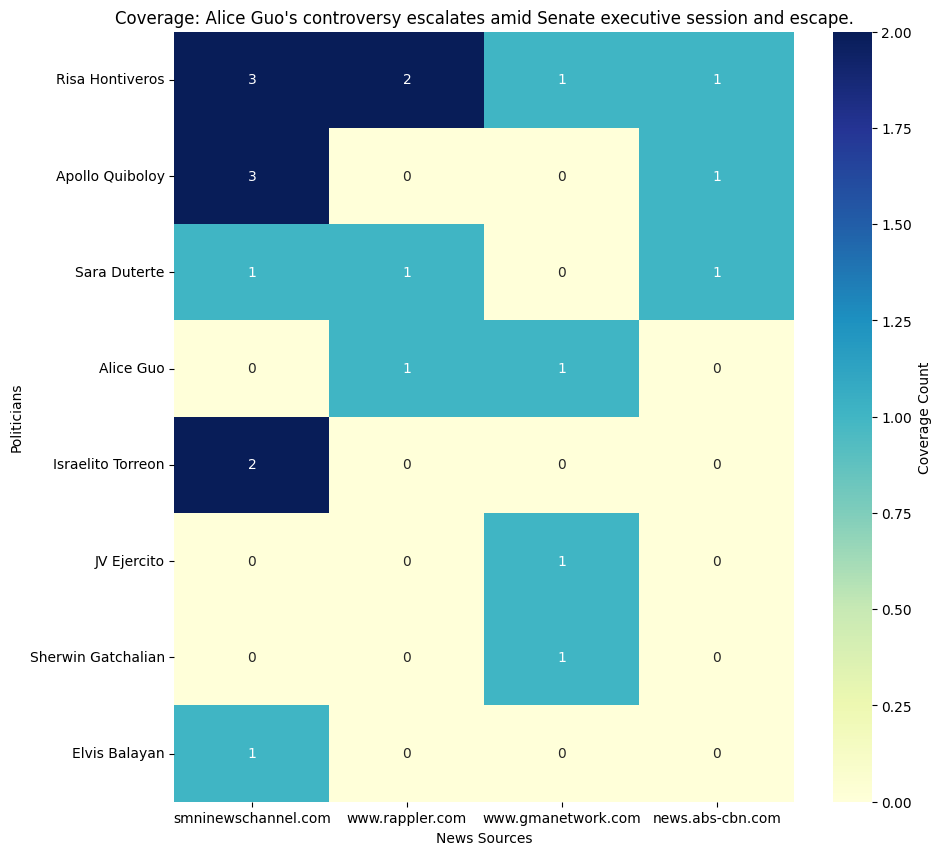

/tmp/ipykernel_35543/2687090006.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preview['politician'] = preview['politician'].apply(lambda x: politician_names[x])
/tmp/ipykernel_35543/2687090006.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preview['source'] = preview['source'].apply(lambda x: source_names[x])


,title,source,politician,sentiment
110,"FACT CHECK: Circulating selfie of Alice Guo, R...",www.rappler.com,Alice Guo,0
111,"FACT CHECK: Circulating selfie of Alice Guo, R...",www.rappler.com,Risa Hontiveros,1
112,Hontiveros to seek realignment of Sara Duterte...,www.rappler.com,Risa Hontiveros,1
113,Hontiveros to seek realignment of Sara Duterte...,www.rappler.com,Sara Duterte,-1
168,Hontiveros: Amend COA-DBM rules on confi funds...,www.gmanetwork.com,Risa Hontiveros,1
173,Gatchalian: No new info from Alice Guo in late...,www.gmanetwork.com,Alice Guo,-1
174,Gatchalian: No new info from Alice Guo in late...,www.gmanetwork.com,JV Ejercito,0
175,Gatchalian: No new info from Alice Guo in late...,www.gmanetwork.com,Sherwin Gatchalian,0
187,VP Duterte’s drug test challenge a 'diversiona...,news.abs-cbn.com,Sara Duterte,0
202,"Eye to eye with Quiboloy, Hontiveros asks: 'Di...",news.abs-cbn.com,Apollo Quiboloy,-1


In [56]:
# idx = 7 - Leni, Duterte
# idx = 12 - Risa, Duterte
# idx = 17 - Leni, Sara
idx = 12
dataset, title, politician_names, source_names = create_dataset_from_cluster(idx)
plot_cluster(dataset, title, politician_names, source_names)

preview = dataset.data[['title','source','politician','sentiment']]
preview['politician'] = preview['politician'].apply(lambda x: politician_names[x])
preview['source'] = preview['source'].apply(lambda x: source_names[x])
preview

In [57]:
num_sources = len(source_names)
num_politicians = len(politician_names)
num_factors = 1
lambda_reg = 0.01

model = MatrixFactorizationModel(num_sources, num_politicians, num_factors, lambda_reg)

# Train the model on the sample data
train(model, dataset, num_epochs=1000, learning_rate=0.005)

Epoch 1/1000, Loss: 57.3957
Epoch 2/1000, Loss: 50.4982
Epoch 3/1000, Loss: 45.2028
Epoch 4/1000, Loss: 40.9467
Epoch 5/1000, Loss: 37.4843
Epoch 6/1000, Loss: 34.6315
Epoch 7/1000, Loss: 32.2502
Epoch 8/1000, Loss: 30.2376
Epoch 9/1000, Loss: 28.5159
Epoch 10/1000, Loss: 27.0258
Epoch 11/1000, Loss: 25.7218
Epoch 12/1000, Loss: 24.5692
Epoch 13/1000, Loss: 23.5411
Epoch 14/1000, Loss: 22.6169
Epoch 15/1000, Loss: 21.7807
Epoch 16/1000, Loss: 21.0202
Epoch 17/1000, Loss: 20.3254
Epoch 18/1000, Loss: 19.6886
Epoch 19/1000, Loss: 19.1033
Epoch 20/1000, Loss: 18.5642
Epoch 21/1000, Loss: 18.0669
Epoch 22/1000, Loss: 17.6077
Epoch 23/1000, Loss: 17.1833
Epoch 24/1000, Loss: 16.7908
Epoch 25/1000, Loss: 16.4278
Epoch 26/1000, Loss: 16.0920
Epoch 27/1000, Loss: 15.7814
Epoch 28/1000, Loss: 15.4941
Epoch 29/1000, Loss: 15.2284
Epoch 30/1000, Loss: 14.9827
Epoch 31/1000, Loss: 14.7555
Epoch 32/1000, Loss: 14.5454
Epoch 33/1000, Loss: 14.3512
Epoch 34/1000, Loss: 14.1715
Epoch 35/1000, Loss: 14

In [58]:
for i in range(len(dataset.data)):
    row = dataset.data.iloc[i]
    pol_idx = row["politician"]
    source_idx = row["source"]
    sentiment = row["sentiment"]
    pred = model(source_idx, pol_idx)
    print(float(pred), sentiment)

-0.15664881467819214 0
1.0502674579620361 1
1.0502674579620361 1
-0.877252459526062 -1
0.5575122833251953 1
-0.5929012298583984 -1
0.009544380940496922 0
0.009305051527917385 0
-0.17212098836898804 0
-0.8154968023300171 -1
0.9330781698226929 1
0.3382323980331421 1
0.47853225469589233 1
-0.29443737864494324 -1
0.3382323980331421 1
0.9563612937927246 1
-0.29443737864494324 -1
0.3382323980331421 -1
0.47853225469589233 0
-0.29443737864494324 1
0.9239610433578491 1


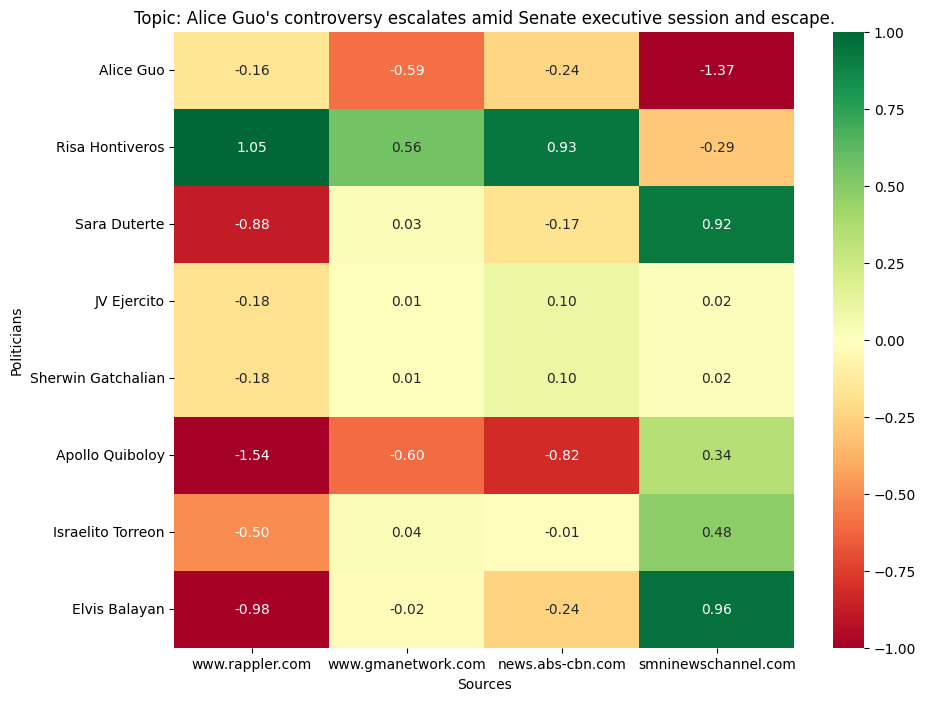

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

table = []
for pol in range(len(politician_names)):
    row = []
    for source in range(len(source_names)):
        pred = model(source, pol)
        row.append(float(pred))
    table.append(row)

table = torch.tensor(table).numpy()

# Create a heatmap to visualize the predictions
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, fmt=".2f", xticklabels=source_names, yticklabels=politician_names, cmap="RdYlGn",vmin=-1, vmax=1)
plt.xlabel("Sources")
plt.ylabel("Politicians")
plt.title(f"Topic: {title}")
plt.show()


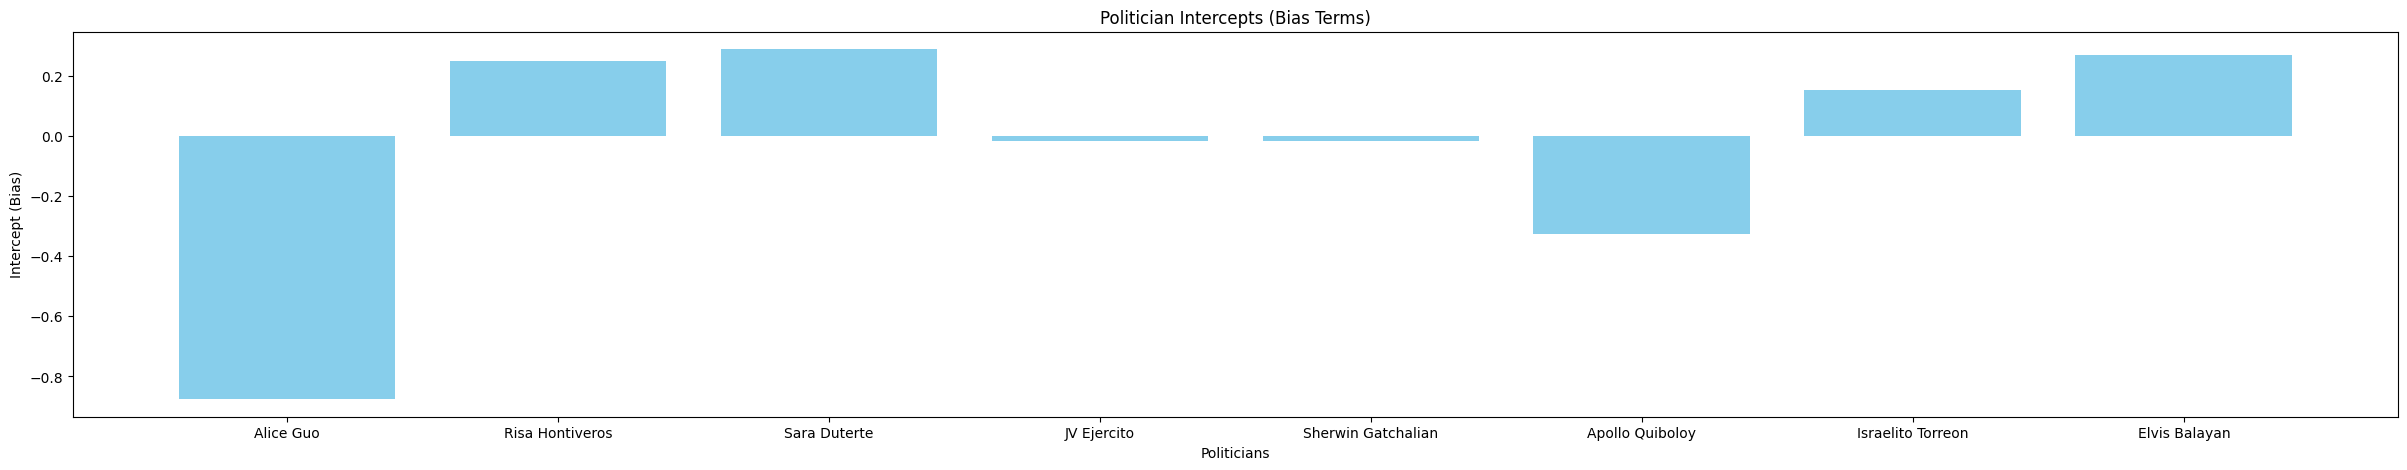

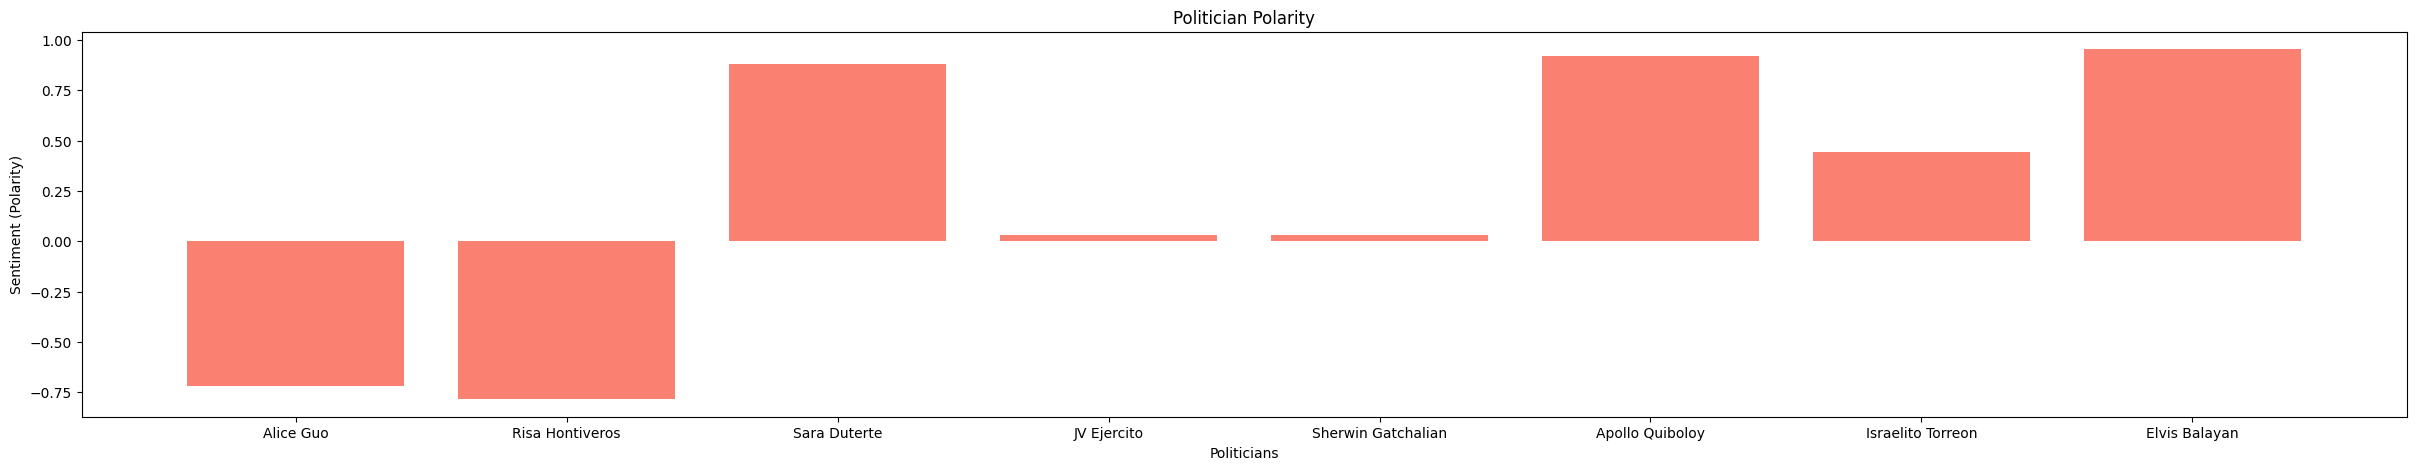

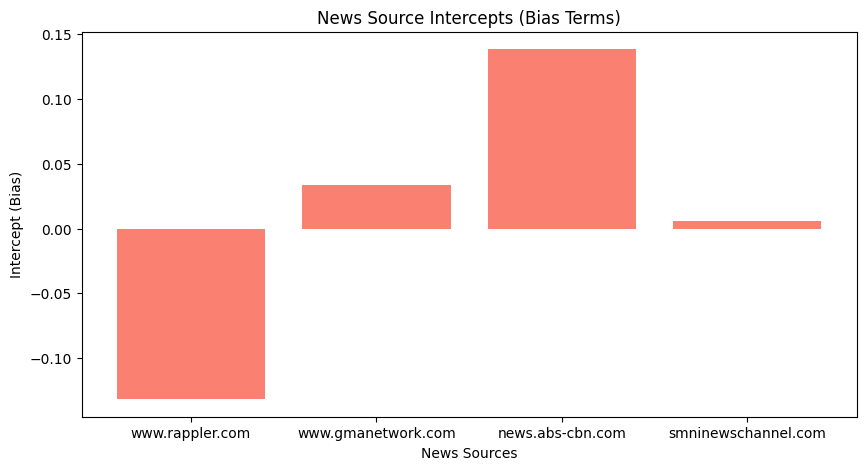

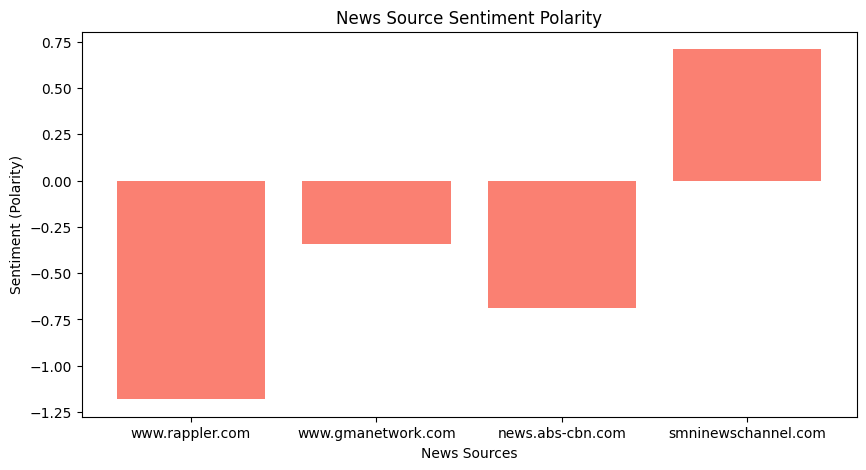

In [63]:
# Get all intercepts
import matplotlib.pyplot as plt
# Extract intercepts (bias terms) from the model
politician_intercepts = model.i_p.detach().numpy()

# Plot Politician Intercepts
plt.figure(figsize=(30, 5))
plt.bar(politician_names, politician_intercepts, color='skyblue')
plt.xlabel("Politicians")
plt.ylabel("Intercept (Bias)")
plt.title("Politician Intercepts (Bias Terms)")
plt.show()

# Plot politician polarity
politican_polarity = model.f_p.detach().numpy()
plt.figure(figsize=(30, 5))
plt.bar(politician_names, politican_polarity, color='salmon')
plt.xlabel("Politicians")
plt.ylabel("Sentiment (Polarity)")
plt.title("Politician Polarity")
plt.show()

# Plot News Source Intercepts
source_intercepts = model.i_s.detach().numpy()
plt.figure(figsize=(10, 5))
plt.bar(source_names, source_intercepts, color='salmon')
plt.xlabel("News Sources")
plt.ylabel("Intercept (Bias)")
plt.title("News Source Intercepts (Bias Terms)")
plt.show()

# Plot news polarity
news_polarity = model.f_s.detach().numpy()
plt.figure(figsize=(10, 5))
plt.bar(source_names, news_polarity, color='salmon')
plt.xlabel("News Sources")
plt.ylabel("Sentiment (Polarity)")
plt.title("News Source Sentiment Polarity")
plt.show()

### Spam example

In [2]:
import pandas as pd

# Load the pickled DataFrame
df = pd.read_pickle("files/articles.pkl")
keywords_df = pd.read_pickle("files/keywords.pkl")
with open("files/cluster_titles.txt", "r") as f:
    cluster_titles = f.read().split('\n')

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt



def prepare_experiment(cluster_id, whitelist_politicians, whitelist_sources, source_limit):

    class MatrixFactorizationModel(nn.Module):
        def __init__(self, num_sources, num_politicians, num_factors, lambda_reg=0.01):
            super(MatrixFactorizationModel, self).__init__()
            
            # Latent factor matrices for sources and politicians
            self.f_s = nn.Parameter(torch.randn(num_sources))  # Latent factors for sources
            self.f_p = nn.Parameter(torch.randn(num_politicians))  # Latent factors for politicians
            
            # Global bias
            self.u = nn.Parameter(torch.randn(1))

            # Bias terms for sources and politicians
            self.i_s = nn.Parameter(torch.randn(num_sources))  # Bias for sources
            self.i_p = nn.Parameter(torch.randn(num_politicians))  # Bias for politicians
            
            self.lambda_reg = lambda_reg  # Regularization strength
        
        def forward(self, source_idx, pol_idx):
            # Matrix factorization equation: M_sp = i_s + i_p + f_s * f_p^T
            pred = self.u[0] + self.i_s[source_idx] + self.i_p[pol_idx] + self.f_s[source_idx] * self.f_p[pol_idx]
            return pred


    def create_dataset_from_cluster(cluster_id):
        def load_normalized_politicians():
            pol_df = pd.read_csv("files/normalized_politicians.csv")
            return pol_df
        
        def sentiment_to_id(sentiment):
            if sentiment == "POSITIVE":
                return 1
            elif sentiment == "NEUTRAL":
                return 0.5
            else:
                return 0

        title = cluster_titles[cluster_id]

        cluster_df = keywords_df[ keywords_df['cluster'] == cluster_id ]
        keywords = cluster_df['keyword'].tolist()

        dataframe = df[ df['keywords'].apply(lambda x: any(keyword in x for keyword in keywords)) ]

        pol_df = load_normalized_politicians()
        articles_titles = dataframe['title'].tolist()

        pol_df = pol_df[ pol_df['title'].isin(articles_titles) ]
        pol_df = pol_df[ pol_df['politician'].isin(whitelist_politicians) ]
        pol_df = pol_df[ pol_df['source'].isin(whitelist_sources) ]

        # Filter
        filtered_rows = []
        for source, limit in source_limit.items():
            for politician in whitelist_politicians:
                test_df = pol_df[(pol_df['source'] == source) & (pol_df['politician'] == politician) ]
                filtered_rows.append(test_df.head(limit))
        pol_df = pd.concat(filtered_rows)
      
        politician_names = pol_df['politician'].unique()
        politician_to_id = {name: idx for idx, name in enumerate(politician_names)}

        source_names = pol_df['source'].unique()
        source_to_id = {name: idx for idx, name in enumerate(source_names)}

        pol_df['politician'] = pol_df['politician'].map(politician_to_id)
        pol_df['source'] = pol_df['source'].map(source_to_id)
        pol_df['sentiment'] = pol_df['sentiment'].map(sentiment_to_id)


        class PoliticianDataset(Dataset):
            def __init__(self, data):
                self.data = data

            def __len__(self):
                return len(self.data)

            def __getitem__(self, idx):
                row = self.data.iloc[idx]
                politician = row["politician"]
                source = row["source"]
                sentiment = row["sentiment"]

                return politician, source, sentiment, idx
        
        dataset = PoliticianDataset(pol_df)
        return (dataset, title, politician_names, source_names)

    def plot_cluster(dataset, title, politician_names, source_names):
        coverage_df = dataset.data.groupby(['politician', 'source']).size().reset_index(name='coverage')
        table = []
        for pol in range(len(politician_names)):
            row = []
            for source in range(len(source_names)):
                coverage = coverage_df[(coverage_df['politician'] == pol) & (coverage_df['source'] == source)]
                if coverage.empty:
                    coverage = 0
                else:
                    coverage = coverage['coverage'].values[0]
                row.append(coverage)
            table.append(row)

        coverage_matrix = pd.DataFrame(table, columns=source_names, index=politician_names)
        coverage_matrix['row_sum'] = coverage_matrix.sum(axis=1)
        coverage_matrix_sorted = coverage_matrix.sort_values(by='row_sum', ascending=False)
        coverage_matrix_sorted = coverage_matrix_sorted[coverage_matrix_sorted.sum(axis=0).sort_values(ascending=False).index]
        coverage_matrix_sorted = coverage_matrix_sorted.drop(columns='row_sum')

        plt.figure(figsize=(12, 2 * len(politician_names)))
        sns.heatmap(coverage_matrix_sorted, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Coverage Count'}, vmin=0,vmax=2)
        plt.xlabel('News Sources')
        plt.ylabel('Politicians')
        plt.title(f"Coverage: {title}")
        plt.show()

    def train(model, data, num_epochs=100, learning_rate=0.01):
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        criterion = nn.MSELoss()

        for epoch in range(num_epochs):
            total_loss = 0.0
            for pol_idx, source_idx, sentiment, idx in data:
                rating = torch.tensor(sentiment, dtype=torch.float)
                
                optimizer.zero_grad()
                
                # Forward pass
                pred = model(source_idx, pol_idx)
                
                # Loss computation with regularization

                lambda_intercept = 0.15
                lambda_factor = 0.03

                loss = criterion(pred, rating) + lambda_intercept * (
                    model.u[0].pow(2).sum() +
                    model.i_s[source_idx].pow(2).sum() + model.i_p[pol_idx].pow(2).sum()) + lambda_factor * (model.f_s[source_idx].pow(2).sum() + model.f_p[pol_idx].pow(2).sum())
                
                # Backward pass and optimization
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            
            # print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

    dataset, title, politician_names, source_names = create_dataset_from_cluster(cluster_id)
    plot_cluster(dataset, title, politician_names, source_names)

    num_sources = len(source_names)
    num_politicians = len(politician_names)
    num_factors = 1
    lambda_reg = 0.01

    model = MatrixFactorizationModel(num_sources, num_politicians, num_factors, lambda_reg)

    # Train the model on the sample data
    train(model, dataset, num_epochs=1000, learning_rate=0.005)

    # Show table
    table = []
    for pol in range(len(politician_names)):
        row = []
        for source in range(len(source_names)):
            pred = model(source, pol)
            row.append(float(pred))
        table.append(row)

    table = torch.tensor(table).numpy()

    # Create a heatmap to visualize the predictions
    plt.figure(figsize=(8, 2))
    sns.heatmap(table, annot=True, fmt=".2f", xticklabels=source_names, yticklabels=politician_names, cmap="RdYlGn",vmin=0, vmax=1)
    plt.xlabel("Sources")
    plt.ylabel("Politicians")
    plt.title(f"Topic: {title}")
    plt.show()

    # Extract intercepts (bias terms) from the model
    politician_intercepts = model.i_p.detach().numpy()
    print(politician_intercepts)

    # Plot Politician Intercepts
    plt.figure(figsize=(8, 2))
    plt.bar(politician_names, politician_intercepts, color='skyblue')
    plt.xlabel("Politicians")
    plt.ylabel("Intercept (Bias)")
    plt.title("Politician Intercepts (Bias Terms)")
    plt.show()

    # Plot politician polarity
    politican_polarity = model.f_p.detach().numpy()
    print(politican_polarity)
    plt.figure(figsize=(8, 2))
    plt.bar(politician_names, politican_polarity, color='salmon')
    plt.xlabel("Politicians")
    plt.ylabel("Sentiment (Polarity)")
    plt.title("Politician Polarity")
    plt.show()

    # Plot News Source Intercepts
    source_intercepts = model.i_s.detach().numpy()
    print(source_intercepts)
    plt.figure(figsize=(8, 2))
    plt.bar(source_names, source_intercepts, color='skyblue')
    plt.xlabel("News Sources")
    plt.ylabel("Intercept (Bias)")
    plt.title("News Source Intercepts (Bias Terms)")
    plt.show()

    # Plot news polarity
    news_polarity = model.f_s.detach().numpy()
    print(news_polarity)
    plt.figure(figsize=(8, 2))
    plt.bar(source_names, news_polarity, color='salmon')
    plt.xlabel("News Sources")
    plt.ylabel("Sentiment (Polarity)")
    plt.title("News Source Sentiment Polarity")
    plt.show()

#### Scenario 1: Empirical data

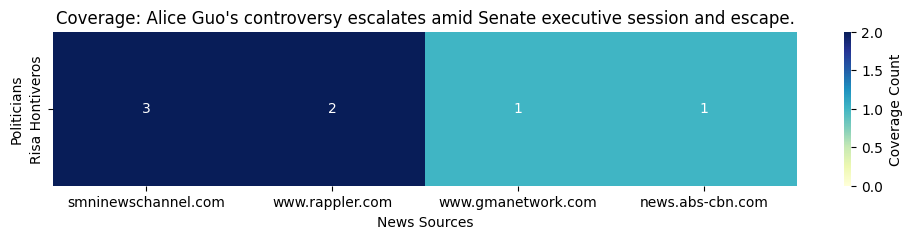

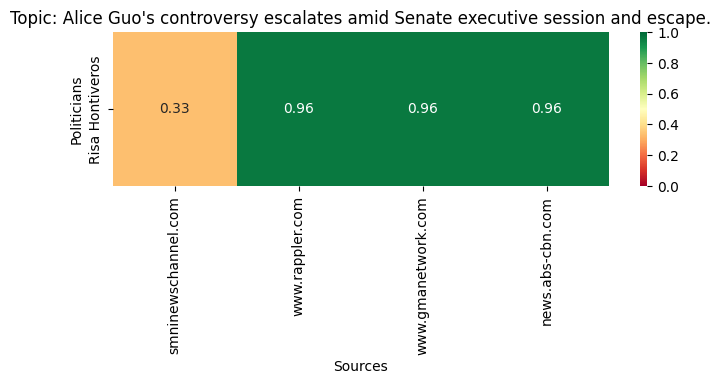

[0.15625753]


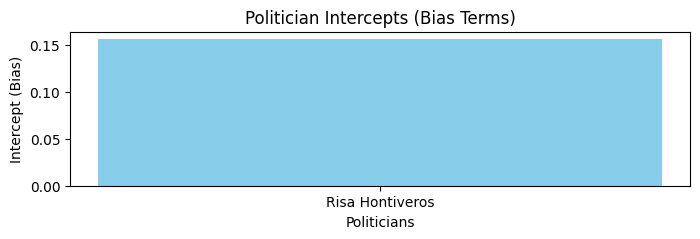

[-0.53854114]


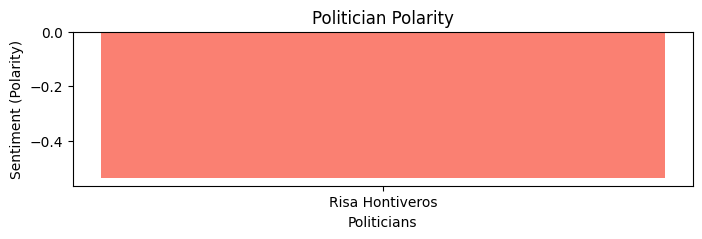

[0.00992239 0.26563764 0.265332   0.26493362]


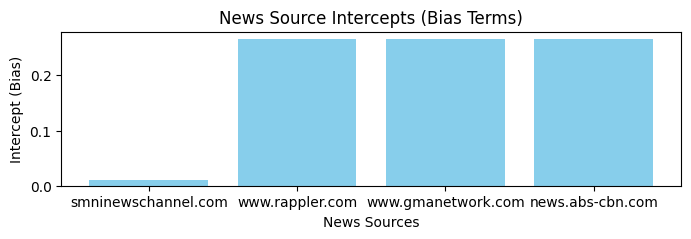

[-0.02107722 -0.71390474 -0.71314    -0.7125658 ]


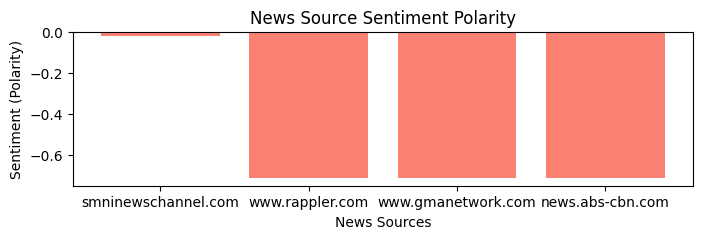

In [11]:

whitelist_politicians = [
    "Risa Hontiveros",
    # "Sara Duterte"
]

whitelist_sources =[
    "smninewschannel.com",
    "www.rappler.com",
    'www.gmanetwork.com',
    "news.abs-cbn.com",
]

prepare_experiment(12, whitelist_politicians, whitelist_sources, {
    "smninewschannel.com": 100,
    "www.rappler.com": 100,
    'www.gmanetwork.com': 100,
    "news.abs-cbn.com": 100
})

#### Scenario 2: 1x Rappler vs 1x SMNI

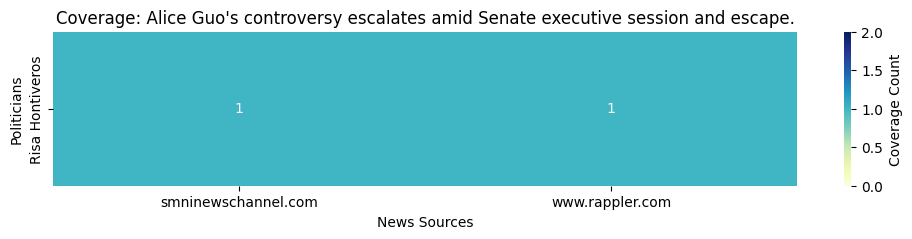

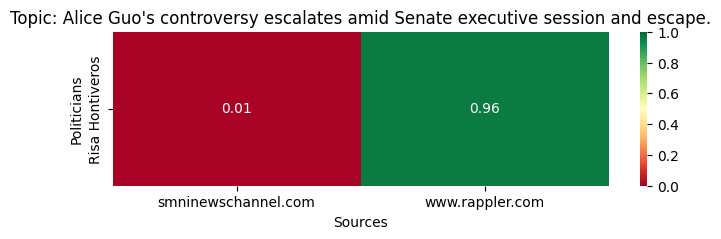

[0.10201933]


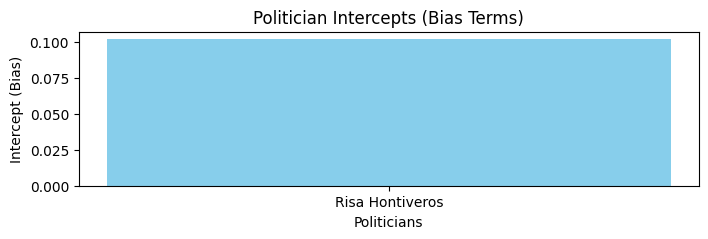

[-0.59273297]


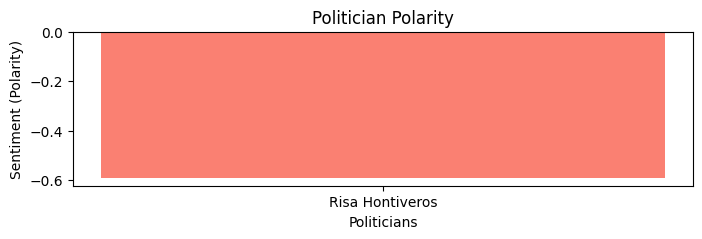

[-0.07014386  0.27405286]


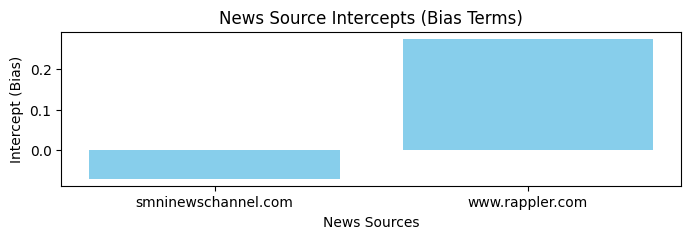

[ 0.20814092 -0.8117857 ]


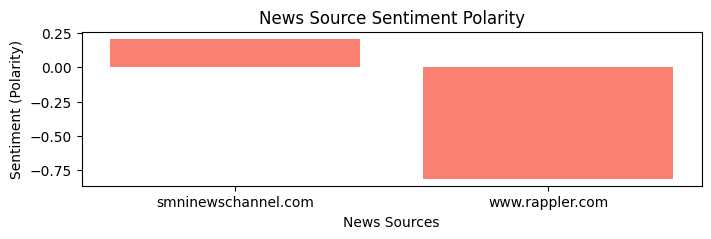

In [12]:

whitelist_politicians = [
    "Risa Hontiveros",
    # "Sara Duterte"
]

whitelist_sources =[
    "smninewschannel.com",
    "www.rappler.com",
    # 'www.gmanetwork.com',
    # "news.abs-cbn.com",
]

prepare_experiment(12, whitelist_politicians, whitelist_sources,{
    "smninewschannel.com": 1,
    "www.rappler.com":1,
})

#### Scenario 3: 1x Rappler vs 1x SMNI

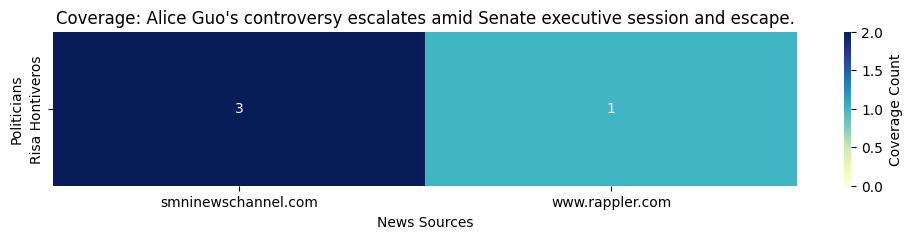

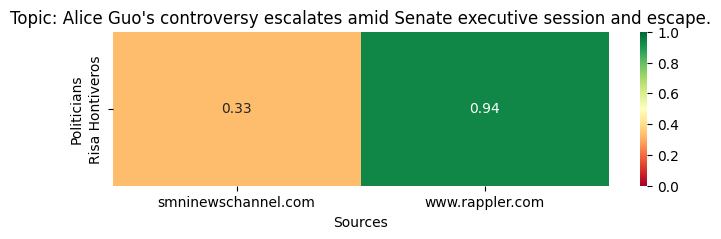

[0.14265992]


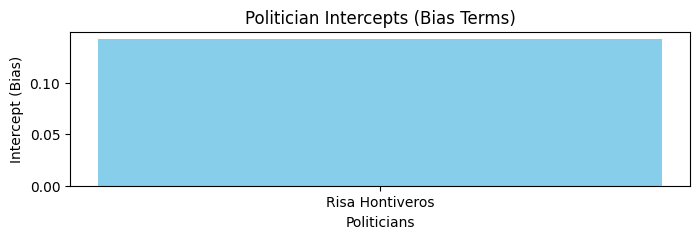

[-0.3146789]


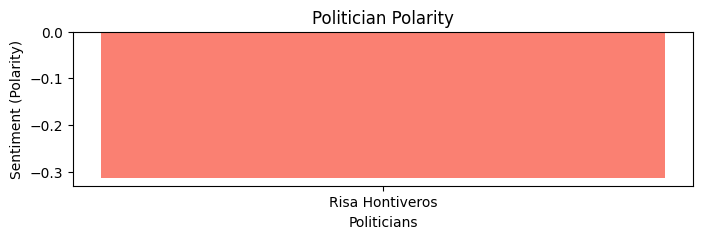

[0.04074742 0.43549657]


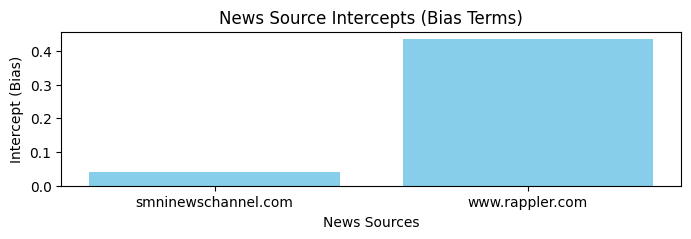

[-0.00643557 -0.6814776 ]


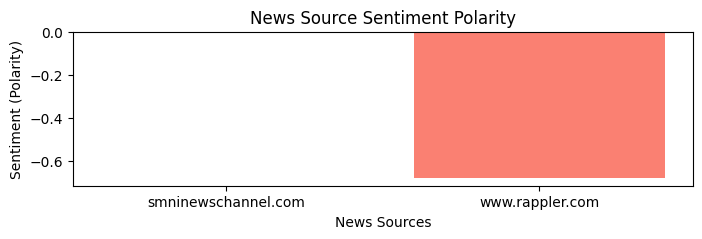

In [13]:
whitelist_politicians = [
    "Risa Hontiveros",
    # "Sara Duterte"
]

whitelist_sources =[
    "smninewschannel.com",
    "www.rappler.com",
    # 'www.gmanetwork.com',
    # "news.abs-cbn.com",
]

prepare_experiment(12, whitelist_politicians, whitelist_sources,{
    "smninewschannel.com": 3,
    "www.rappler.com":1,
})

##### Some results

Cluster 7


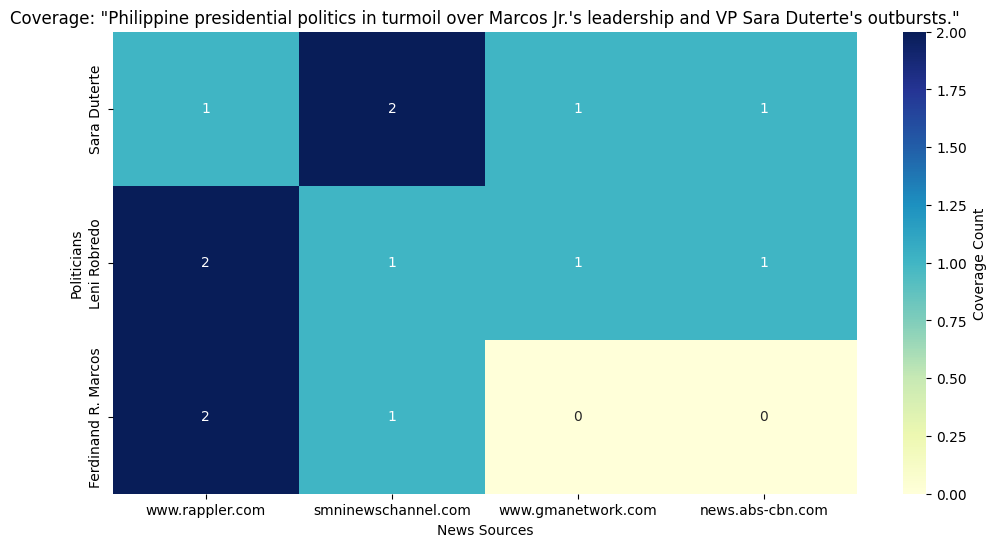

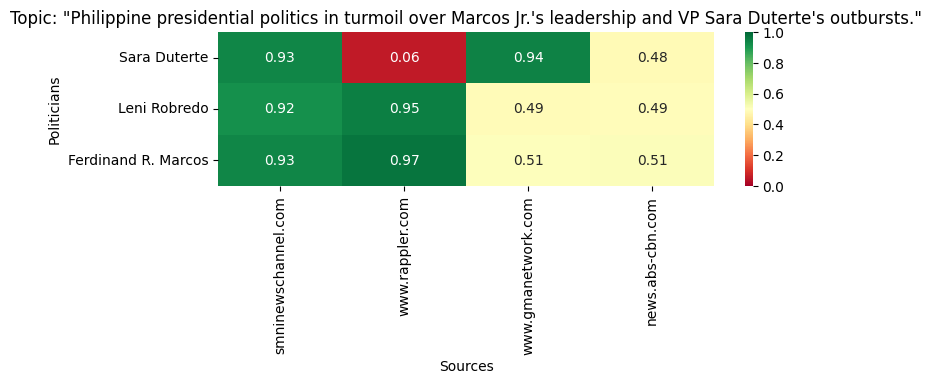

[0.1642031  0.26750863 0.28575224]


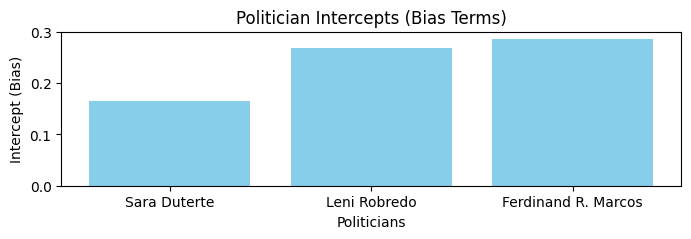

[ 0.6317808  -0.42630067 -0.42524478]


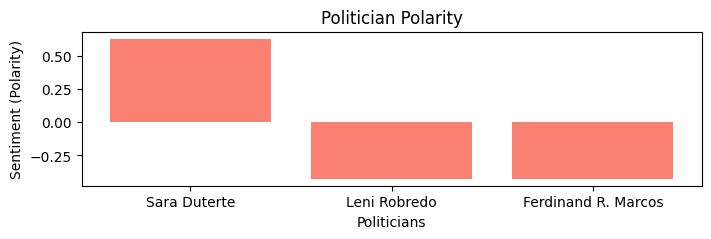

[0.46554786 0.13380575 0.21327156 0.03006352]


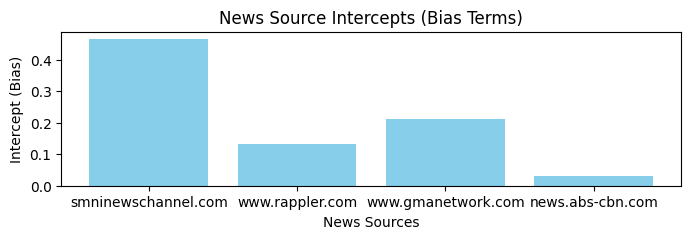

[ 0.11477445 -0.7474132   0.5286614   0.08955219]


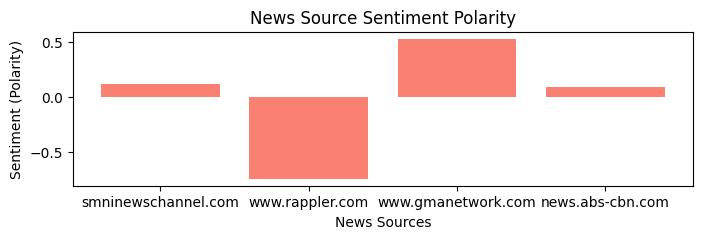

Cluster 12


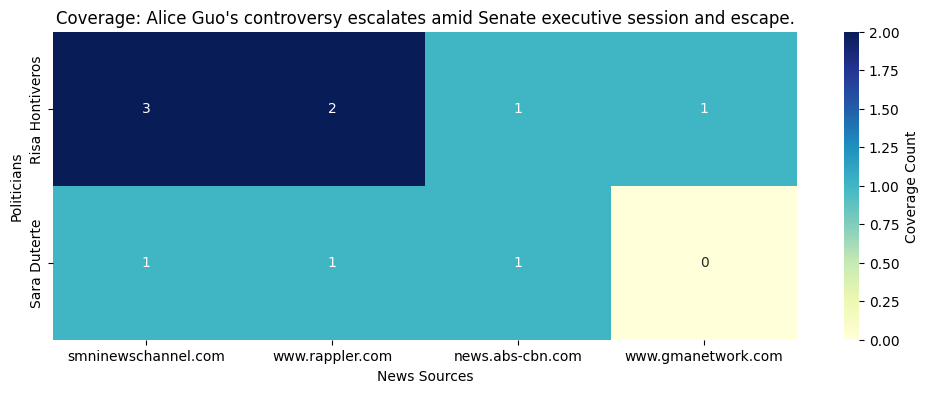

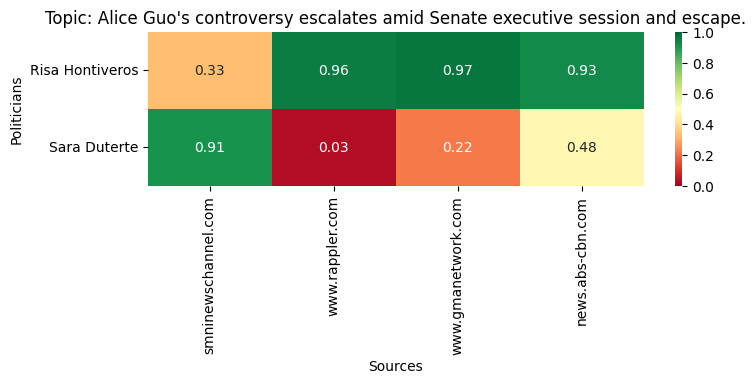

[0.20286527 0.20206095]


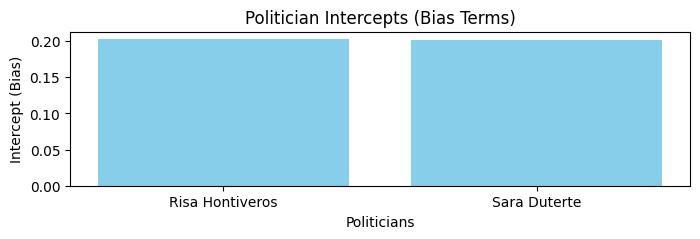

[ 0.5347343 -0.6697204]


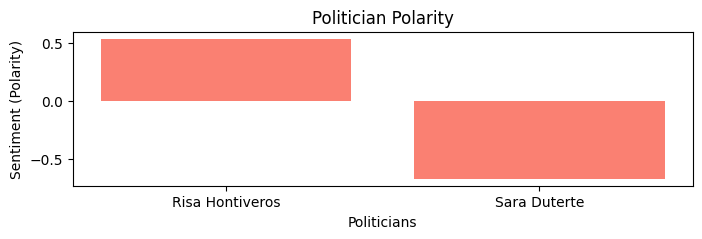

[0.18227302 0.13871805 0.23076715 0.3228533 ]


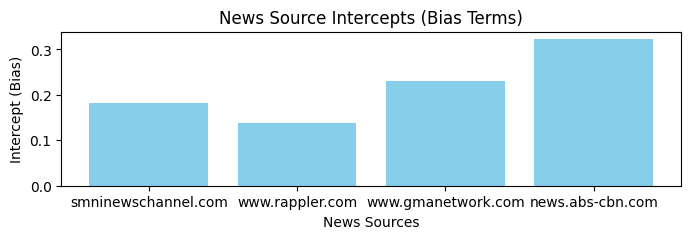

[-0.47848102  0.76999015  0.617151    0.37609902]


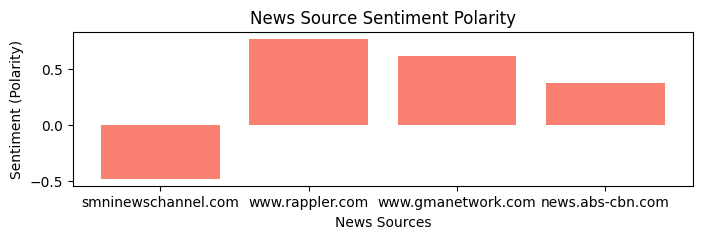

Cluster 17


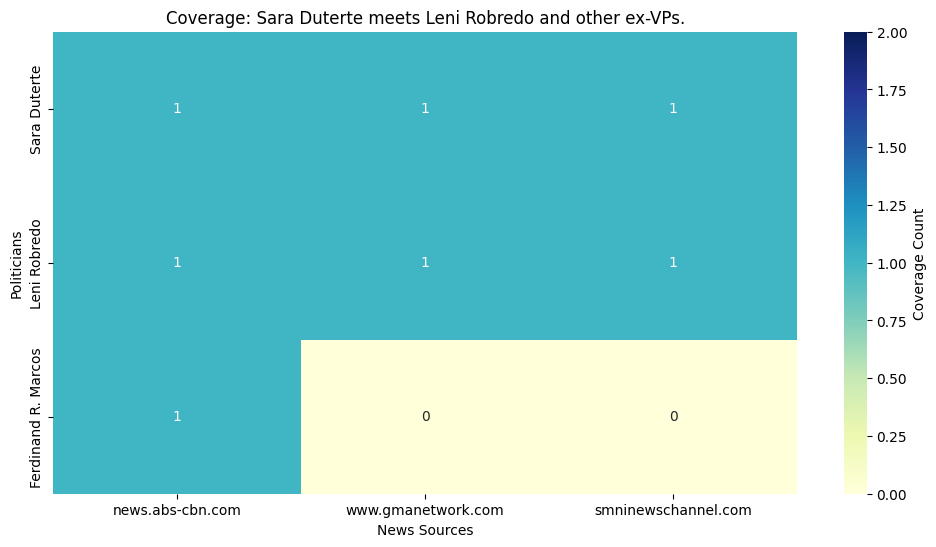

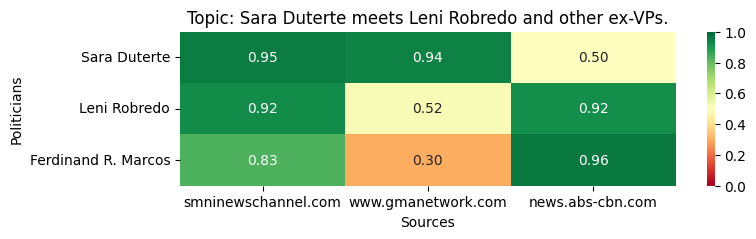

[0.20935337 0.30803096 0.2520222 ]


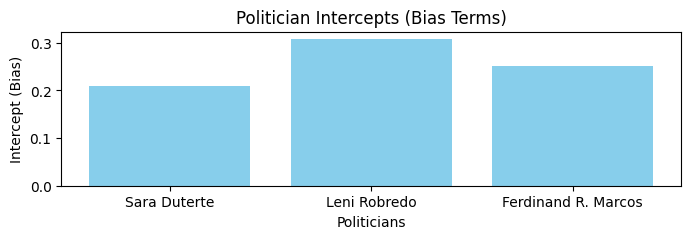

[ 0.56657785 -0.24033305 -0.48602742]


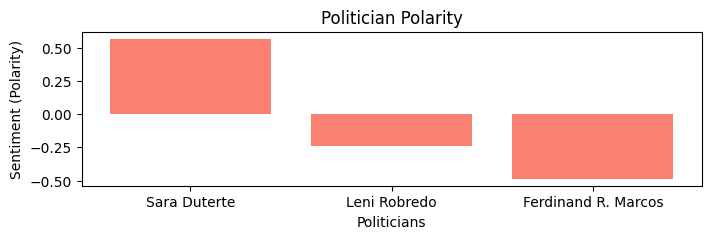

[0.39737192 0.10786153 0.25960258]


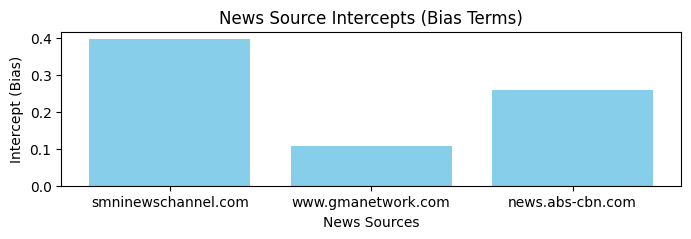

[ 0.15954114  0.6526199  -0.3971551 ]


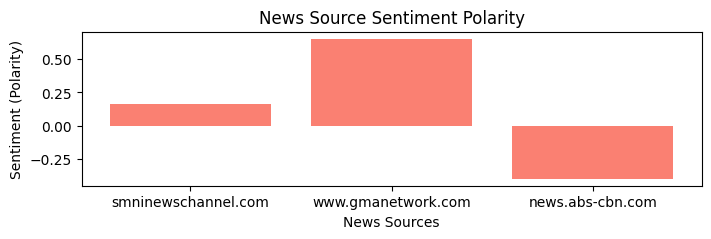

In [14]:
# idx = 7 - Leni, Duterte
# idx = 12 - Risa, Duterte
# idx = 17 - Leni, Sara
idx = 12

clusters = [
    7,
    12,
    17
]

whitelist_politicians = [
    "Risa Hontiveros",
    "Sara Duterte",
    "Leni Robredo",
    "Bongong Marcos Jr.",
    "Ferdinand R. Marcos"
]

whitelist_sources =[
    "smninewschannel.com",
    "www.rappler.com",
    'www.gmanetwork.com',
    "news.abs-cbn.com",
]

for cluster in clusters:
    print(f"Cluster {cluster}")
    prepare_experiment(cluster, whitelist_politicians, whitelist_sources, {
        "smninewschannel.com": 100,
        "www.rappler.com": 100,
        'www.gmanetwork.com': 100,
        "news.abs-cbn.com": 100
    })